In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import  statsmodels.formula.api as smf

**DataSet**

In [ ]:
pt = pd.read_excel("/content/drive/MyDrive/Module_2/assignment_01_ML/Assignment_Datasets/PrawnTrawling.xls")
pt

,Zone,Year,Latitude,Longitude,Depth,Score 1,Score 2
0,0,0,-11.12,142.84,20.0,1.63515,-0.30103
1,0,1,-11.28,142.85,9.0,-0.30103,1.54345
2,1,1,-11.48,142.86,11.0,1.54921,1.75813
3,0,0,-11.19,142.87,22.0,1.03278,-0.30103
4,1,0,-11.69,142.88,7.0,0.18235,2.45885
...,...,...,...,...,...,...,...
150,1,0,-11.30,143.89,32.0,-0.30103,2.31835
151,0,0,-11.15,143.90,33.0,-0.30103,-0.30103
152,0,0,-11.26,143.91,33.0,0.04624,1.69945
153,1,1,-11.39,143.92,35.0,-0.30103,0.71878


In [ ]:
pt=pt.rename(columns={'Score 1':'Fish_T1',
                   'Score 2':'Fish_T2',})
pt.head()

,Zone,Year,Latitude,Longitude,Depth,Fish_T1,Fish_T2
0,0,0,-11.12,142.84,20.0,1.63515,-0.30103
1,0,1,-11.28,142.85,9.0,-0.30103,1.54345
2,1,1,-11.48,142.86,11.0,1.54921,1.75813
3,0,0,-11.19,142.87,22.0,1.03278,-0.30103
4,1,0,-11.69,142.88,7.0,0.18235,2.45885


F_T1 = Fish Type 1

F_T2 = Fish Type 2

In [ ]:
pt.shape

(155, 7)

In [ ]:
pt.isnull().sum()

Zone         0
Year         0
Latitude     0
Longitude    0
Depth        6
Fish_T1      0
Fish_T2      0
dtype: int64

In [ ]:
#filling null value with the mean of a column
pt = pt.dropna()

In [ ]:
pt.isnull().sum()

Zone         0
Year         0
Latitude     0
Longitude    0
Depth        0
Fish_T1      0
Fish_T2      0
dtype: int64

In [ ]:
pt.describe()

,Zone,Year,Latitude,Longitude,Depth,Fish_T1,Fish_T2
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.563758,0.516779,-11.514228,143.331678,26.844966,0.905739,0.955736
std,0.497591,0.501404,0.245558,0.301309,8.653475,0.767068,1.135775
min,0.000000,0.000000,-11.920000,142.840000,6.000000,-0.301030,-0.301030
25%,0.000000,0.000000,-11.720000,143.080000,22.000000,0.182350,-0.301030
50%,1.000000,1.000000,-11.510000,143.270000,28.000000,1.121690,0.791920
75%,1.000000,1.000000,-11.300000,143.590000,31.000000,1.527530,1.981790
max,1.000000,1.000000,-11.120000,143.930000,60.000000,2.077490,3.577590


In [ ]:
stats.shapiro(pt['Fish_T1'])

ShapiroResult(statistic=0.8945823907852173, pvalue=7.218244224560522e-09)

In [ ]:
stats.shapiro(pt['Fish_T2'])

ShapiroResult(statistic=0.8894020318984985, pvalue=3.8056851003887004e-09)

In [ ]:
stats.shapiro(pt)

ShapiroResult(statistic=0.5789052248001099, pvalue=1.8216880036222622e-44)

In [ ]:
stats.shapiro(pt['Zone'])

ShapiroResult(statistic=0.6304616332054138, pvalue=8.639967672565378e-18)

In [ ]:
stats.shapiro(pt['Depth'])

ShapiroResult(statistic=0.9586463570594788, pvalue=0.0001945024123415351)

In [ ]:
stats.shapiro(pt['Longitude'])

ShapiroResult(statistic=0.9514687061309814, pvalue=4.612072370946407e-05)

In [ ]:
stats.shapiro(pt['Latitude'])

ShapiroResult(statistic=0.9401683211326599, pvalue=5.811795745103154e-06)

<function matplotlib.pyplot.show(close=None, block=None)>

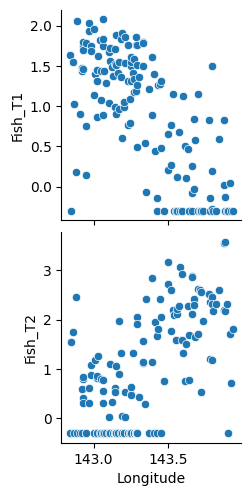

In [ ]:
sns.pairplot(pt, x_vars = ['Longitude'], y_vars = ['Fish_T1','Fish_T2'], kind = 'scatter')
plt.show

<Axes: >

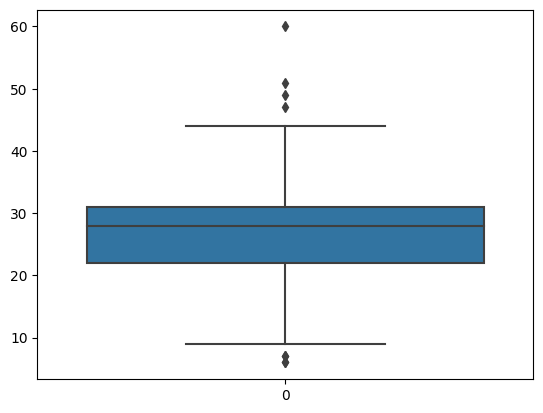

In [ ]:
sns.boxplot(pt['Depth'])

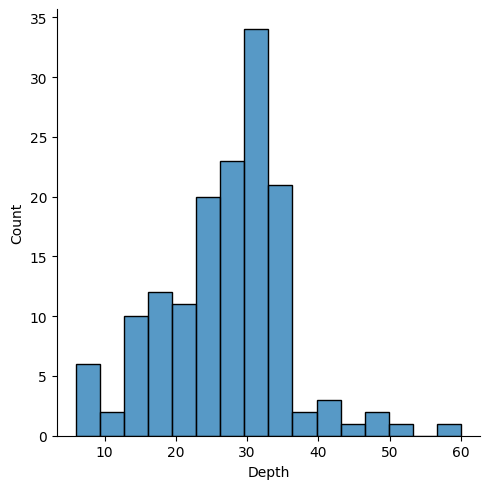

In [ ]:
sns.displot(pt['Depth'])

In [ ]:
Q1 = pt.Depth.quantile(0.25)
Q3 = pt.Depth.quantile(0.75)
Q1,Q3

(22.0, 31.0)

In [ ]:
IQR = Q3 - Q1
IQR

9.0

In [ ]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit,upper_limit

(8.5, 44.5)

In [ ]:
df = pt[~((pt.Depth < (Q1 - 1.5 * IQR)) | (pt.Depth > (Q3 + 1.5 * IQR)))]
df

,Zone,Year,Latitude,Longitude,Depth,Fish_T1,Fish_T2
0,0,0,-11.12,142.84,20.0,1.63515,-0.30103
1,0,1,-11.28,142.85,9.0,-0.30103,1.54345
2,1,1,-11.48,142.86,11.0,1.54921,1.75813
3,0,0,-11.19,142.87,22.0,1.03278,-0.30103
5,1,0,-11.39,142.89,18.0,2.05702,-0.30103
...,...,...,...,...,...,...,...
150,1,0,-11.30,143.89,32.0,-0.30103,2.31835
151,0,0,-11.15,143.90,33.0,-0.30103,-0.30103
152,0,0,-11.26,143.91,33.0,0.04624,1.69945
153,1,1,-11.39,143.92,35.0,-0.30103,0.71878


In [ ]:
df.shape

(141, 7)

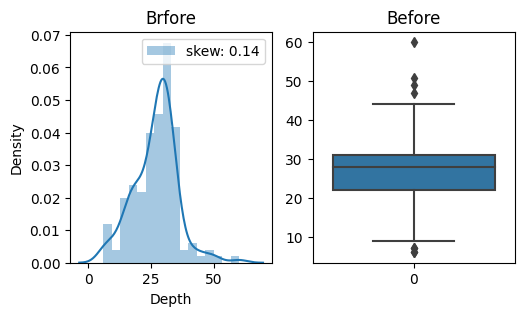

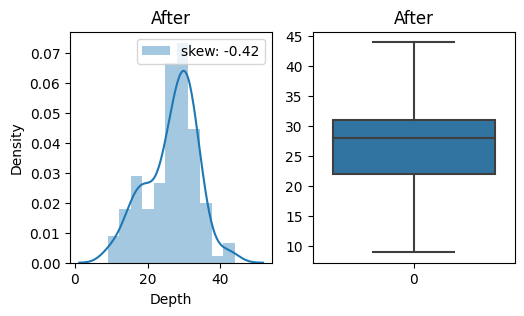

In [ ]:
plt.figure(figsize = (12,3))

plt.subplot(141)
sns.distplot(pt['Depth'], label="skew: " + str(np.round(pt['Depth'].skew(),2)))
plt.title('Brfore')
plt.legend()

plt.subplot(142)
sns.boxplot(pt['Depth'])
plt.title('Before')

plt.figure(figsize = (12,3))
plt.subplot(143)
sns.distplot(df['Depth'], label="skew: " + str(np.round(df['Depth'].skew(),2)))
plt.title('After')
plt.legend()


plt.subplot(144)
sns.boxplot(df['Depth'])
plt.title('After')
plt.show()

In [ ]:
stats.shapiro(df['Depth'])

ShapiroResult(statistic=0.9655742049217224, pvalue=0.0012798839015886188)

In [ ]:
train = df.sample(frac=0.80,random_state=1)
test = df.drop(train.index)

In [ ]:
x3= df[['Longitude','Depth']]
vif4=[variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
pd.Series(vif4,index=x3.columns)

Longitude    15.804253
Depth        15.804253
dtype: float64

In [ ]:
x2= df[['Longitude','Latitude']]
vif3=[variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
pd.Series(vif3,index=x2.columns)

Longitude    2291.526312
Latitude     2291.526312
dtype: float64

In [ ]:
pt_f1 =smf.ols('np.log(Fish_T1) ~ Longitude', data=train).fit()
print(pt_f1.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log(Fish_T1)   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     60.77
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.55e-11
Time:                        08:18:35   Log-Likelihood:                -78.219
No. Observations:                  86   AIC:                             160.4
Df Residuals:                      84   BIC:                             165.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    283.4396     36.355      7.797      0.0

In [ ]:
stats.shapiro(pt_f1.resid)

ShapiroResult(statistic=0.8973044753074646, pvalue=4.772433385369368e-06)

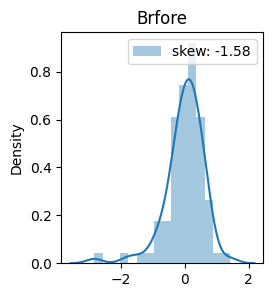

In [ ]:
plt.figure(figsize = (12,3))
plt.subplot(142)
sns.distplot(pt_f1.resid, label="skew: " + str(np.round(pt_f1.resid.skew(),2)))
plt.title('Brfore')
plt.legend()

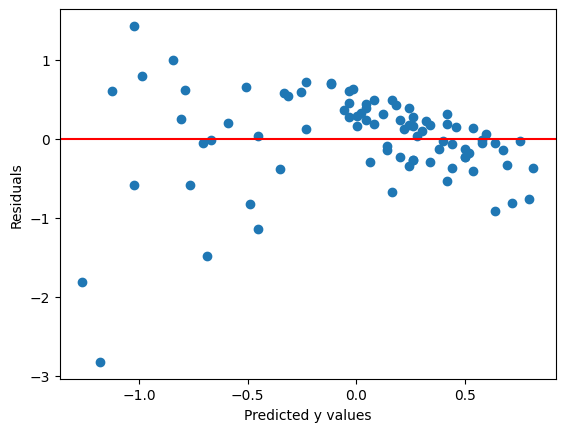

In [ ]:
plt.scatter(pt_f1.fittedvalues,pt_f1.resid)
plt.xlabel("Predicted y values")
plt.ylabel("Residuals")
plt.axhline(0,color = 'red')

In [ ]:
pt_f2 = smf.ols('Fish_T2 ~ Longitude + Latitude + Depth', data=train).fit()
print(pt_f2.summary())

                            OLS Regression Results                            
Dep. Variable:                Fish_T2   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     48.30
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           6.15e-20
Time:                        08:18:36   Log-Likelihood:                -125.55
No. Observations:                 113   AIC:                             259.1
Df Residuals:                     109   BIC:                             270.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -431.6191     37.028    -11.656      0.0

In [ ]:
stats.shapiro(pt_f2.resid)

ShapiroResult(statistic=0.9891009330749512, pvalue=0.502727746963501)

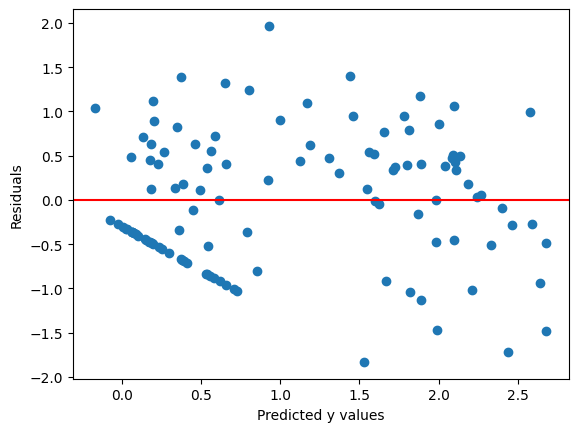

In [ ]:
plt.scatter(pt_f2.fittedvalues,pt_f2.resid)
plt.xlabel("Predicted y values")
plt.ylabel("Residuals")
plt.axhline(0,color = 'red')

# Towards the West Direction you will find highest Concentration of Type 1 Fish

# Towards the North East Direction you will find highest Concentration of Type 2 Fish